[EDA](#EDA)<br>
&emsp;[Univariate Analysis](#Univariate-Analysis)<br>
&emsp;&emsp;[Airline](#Airline)<br>
&emsp;&emsp;[Date of Journey](#Date-of-Journey)<br>
&emsp;&emsp;[Source & Destination](#Source-%26-Destination)<br>
&emsp;&emsp;[Departure Time & Arrival Time](#Departure-Time-%26-Arrival-Time)<br>
&emsp;&emsp;[Duration](#Duration)<br>
&emsp;&emsp;[Total Stops](#Total-Stops)<br>
&emsp;&emsp;[Additional Information](#Additional-Information)<br>
&emsp;&emsp;[Price](#Price)<br>
&emsp;[Bivariate Analysis](#Bivariate-Analysis)<br>
&emsp;&emsp;[Airline vs Price](#Airline-vs-Price)<br>
&emsp;&emsp;[Date of Journey vs Price](#Date-of-Journey-vs-Price)<br>
&emsp;&emsp;[Source vs Price & Destination vs Price](#Source-vs-Price-%26-Destination-vs-Price)<br>
&emsp;&emsp;[Departure Time vs Price & Arrival Time vs Price](#Departure-Time-vs-Price-%26-Arrival-Time-vs-Price)<br>
&emsp;&emsp;[Duration vs Price](#Duration-vs-Price)<br>
&emsp;&emsp;[Total Stops vs Price](#Total-Stops-vs-Price)<br>
&emsp;&emsp;[Additional Information vs Price](#Additional-Information-vs-Price)<br>

In [1]:
import urllib, json
def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    with open(notebook_path, 'r') as in_f:
        nb_json = json.load(in_f)
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            print(out_line, end="")

In [2]:
generate_toc('EDA.ipynb')

[EDA](#EDA)<br>
&emsp;[Univariate Analysis](#Univariate-Analysis)<br>
&emsp;&emsp;[Airline](#Airline)<br>
&emsp;&emsp;[Date of Journey](#Date-of-Journey)<br>
&emsp;&emsp;[Source & Destination](#Source-%26-Destination)<br>
&emsp;&emsp;[Departure Time & Arrival Time](#Departure-Time-%26-Arrival-Time)<br>
&emsp;&emsp;[Duration](#Duration)<br>
&emsp;&emsp;[Total Stops](#Total-Stops)<br>
&emsp;&emsp;[Additional Information](#Additional-Information)<br>
&emsp;&emsp;[Price](#Price)<br>
&emsp;[Bivariate Analysis](#Bivariate-Analysis)<br>
&emsp;&emsp;[Airline vs Price](#Airline-vs-Price)<br>
&emsp;&emsp;[Date of Journey vs Price](#Date-of-Journey-vs-Price)<br>
&emsp;&emsp;[Source vs Price & Destination vs Price](#Source-vs-Price-%26-Destination-vs-Price)<br>
&emsp;&emsp;[Departure Time vs Price & Arrival Time vs Price](#Departure-Time-vs-Price-%26-Arrival-Time-vs-Price)<br>
&emsp;&emsp;[Duration vs Price](#Duration-vs-Price)<br>
&emsp;&emsp;[Total Stops vs Price](#Total-Stops-vs-Price)<br>
&ems

# EDA

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (11, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

In [5]:
PROJECT_DIR = 'R:/Jaydeep/Flight-Price-Prediction'
DATA_DIR = 'data'
TRAIN_DATASET_NAME = 'train'

In [6]:
def get_dataset(dataset_name):
    file_name = f'{dataset_name}.csv'
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [7]:
def convert_dates(df):
    # Convert 'date_of_journey' column to datetime format, assuming day-first format
    df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], dayfirst=True)
    return df

def convert_times(df):
    # Convert 'dep_time' and 'arrival_time' columns to time format
    df['dep_time'] = pd.to_datetime(df['dep_time']).dt.time
    df['arrival_time'] = pd.to_datetime(df['arrival_time']).dt.time
    return df

In [8]:
train_df = get_dataset(TRAIN_DATASET_NAME)
train_df = convert_dates(train_df)              # Convert 'date_of_journey' column to datetime format
train_df = convert_times(train_df)              # Convert 'dep_time' and 'arrival_time' columns to time format

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6693 entries, 0 to 6692
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6693 non-null   object        
 1   date_of_journey  6693 non-null   datetime64[ns]
 2   source           6693 non-null   object        
 3   destination      6693 non-null   object        
 4   dep_time         6693 non-null   object        
 5   arrival_time     6693 non-null   object        
 6   duration_minute  6693 non-null   int64         
 7   total_stops      6693 non-null   int64         
 8   additional_info  6693 non-null   object        
 9   price            6693 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 523.0+ KB


In [10]:
train_df.shape

(6693, 10)

In [11]:
train_df.duplicated().sum()

0

In [12]:
train_df.isnull().sum().sum()

0

In [13]:
train_df.sample(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration_minute,total_stops,additional_info,price
4591,Air India,2019-05-12,Kolkata,Banglore,09:25:00,21:50:00,745,1,no info,8891
3261,Air India,2019-06-06,Delhi,Cochin,09:45:00,23:00:00,795,1,no info,8907
1393,Jet Airways,2019-04-27,Banglore,Delhi,07:10:00,10:10:00,180,0,no info,7229
2915,Multiple Carriers,2019-05-27,Delhi,Cochin,13:00:00,19:15:00,375,1,no info,15898
558,Jet Airways,2019-05-27,Banglore,Delhi,19:50:00,22:50:00,180,0,no info,7229


## Univariate Analysis

**Dataset Overview**
- The dataset contains 6,693 rows and 10 columns.

**1. Airline**
- There are 8 airlines in the dataset.
- The most frequent airline is Jet Airways, while the least frequent is Goair.

**Date of Journey**
- The journey dates range from March 1, 2019, to June 27, 2019.
- The highest number of flights occur in May, while the fewest occur in April.
- Wednesday sees the most flights, while Friday and Tuesday have the least.

**Source**
- Flights originate from 5 different cities.
- Delhi is the most common source city, while Chennai is the least common.

**Destination**
- There are 6 different destination cities.
- Cochin is the most common destination, while Kolkata is the least common.

**Departure Time & Arrival Time**
- Most flights depart between 8:00 AM and 4:00 PM, and most flights arrive between 4:00 PM and 12:00 PM.
- Fewer flights depart or arrive between 12:00 AM and 8:00 AM.

**Duration**
- The average flight duration is approximately 623 minutes (about 10 hours and 23 minutes).
- The median flight duration is 505 minutes (8 Hour and 25 Minutes)
- The shortest flight duration is 75 minutes, and the longest is 2,820 minutes (about 47 hours).
- The distribution of flight duration is right-skewed with a skewness of 0.92.
- Outliers above the upper whisker (computed as Q3 + 1.5 * IQR) account for 0.7% of the data.

**Total Stops**
- Flights have either no stops or up to 3 stops.
- The most frequent number of stops is 1, while the least frequent is 3.

**Additional Information**
- Breakdown of additional information:
  - No info: 79.0%
  - In-flight meal not included: 17.8%
  - No check-in baggage included: 2.8%
  - 1 long layover: 0.2%
  - Change airports: 0.04%
  - Business class: 0.04%
  - 2 long layovers: 0.01%
  - Red-eye flight: 0.01%
  - 1 short layover: 0.01%

**Price**
- The average price of a flight is approximately 9,042 units.
- The minimum price is 1,759 units, and the maximum price is 79,512 units.
- The distribution of prices is highly right-skewed with a skewness of 1.91 and a kurtosis of 14.87.
- Outliers above the upper whisker (computed as Q3 + 1.5 * IQR) account for 0.9% of the data.

### Airline

In [14]:
train_df.airline.nunique()

8

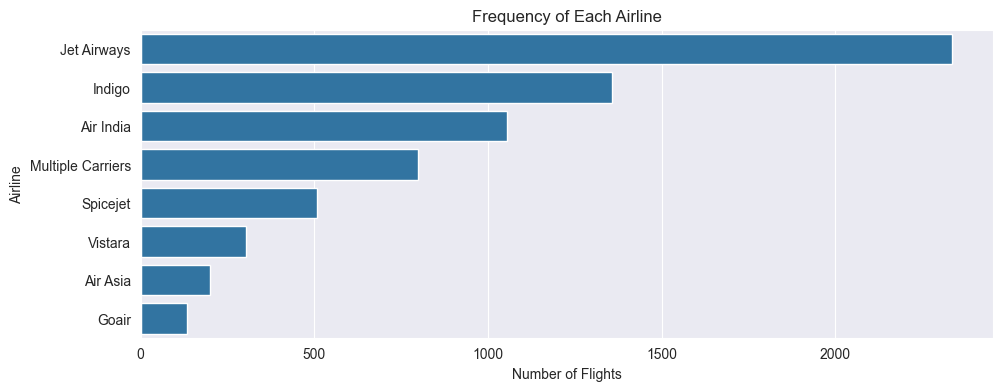

In [15]:
airline_counts = train_df['airline'].value_counts().sort_values(ascending=False)
sns.countplot(y=train_df['airline'], order=airline_counts.index)
plt.title('Frequency of Each Airline')
plt.ylabel('Airline')
plt.xlabel('Number of Flights')
plt.show()

### Date of Journey

In [16]:
formatted_min_date = train_df['date_of_journey'].min().strftime('%Y-%m-%d')
formatted_max_date = train_df['date_of_journey'].max().strftime('%Y-%m-%d')

print(f"Minimum Date of Journey: {formatted_min_date}")
print(f"Maximum Date of Journey: {formatted_max_date}")

Minimum Date of Journey: 2019-03-01
Maximum Date of Journey: 2019-06-27


In [17]:
train_df.date_of_journey.dt.year.unique().tolist()

[2019]

In [18]:
train_df.date_of_journey.dt.month_name().unique().tolist()

['May', 'June', 'March', 'April']

In [19]:
sorted(train_df.date_of_journey.dt.day.unique().tolist())

[1, 3, 6, 9, 12, 15, 18, 21, 24, 27]

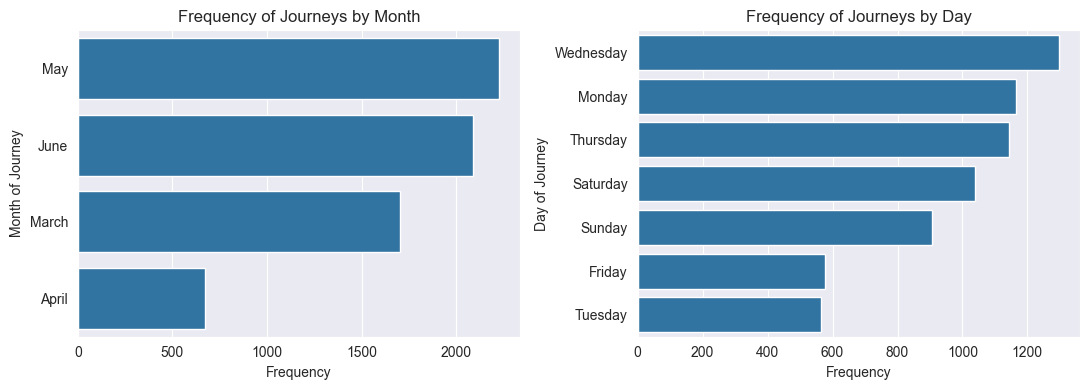

In [20]:
fig, axs = plt.subplots(1, 2)

date_of_journey_counts_month = train_df['date_of_journey'].dt.month_name().value_counts().sort_values(ascending=False)
sns.countplot(y=train_df['date_of_journey'].dt.month_name(), order=date_of_journey_counts_month.index, ax=axs[0])
axs[0].set_title('Frequency of Journeys by Month')
axs[0].set_ylabel('Month of Journey')
axs[0].set_xlabel('Frequency')

date_of_journey_counts_day = train_df['date_of_journey'].dt.day_name().value_counts().sort_values(ascending=False)
sns.countplot(y=train_df['date_of_journey'].dt.day_name(), order=date_of_journey_counts_day.index, ax=axs[1])
axs[1].set_title('Frequency of Journeys by Day')
axs[1].set_ylabel('Day of Journey')
axs[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

### Source & Destination

In [21]:
train_df.source.nunique(), train_df.destination.nunique()

(5, 6)

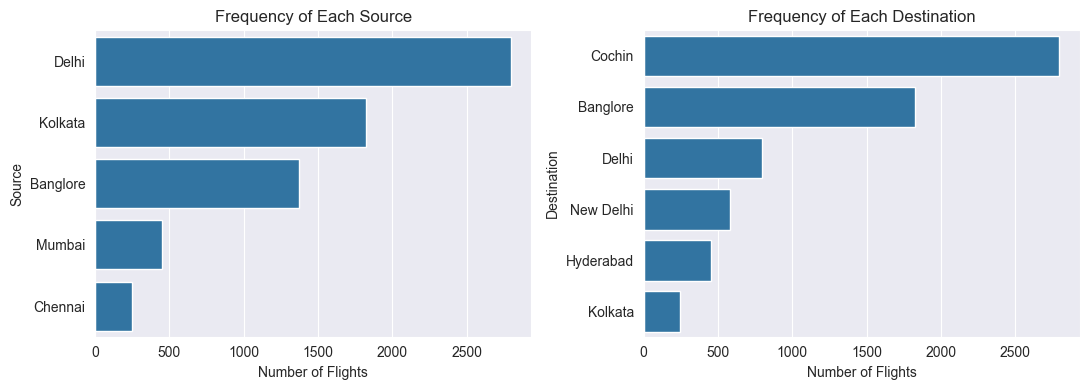

In [22]:
fig, axs = plt.subplots(1, 2)

source_counts = train_df['source'].value_counts().sort_values(ascending=False)
sns.countplot(y=train_df['source'], order=source_counts.index, ax=axs[0])
axs[0].set_title('Frequency of Each Source')
axs[0].set_ylabel('Source')
axs[0].set_xlabel('Number of Flights')

destination_counts = train_df['destination'].value_counts().sort_values(ascending=False)
sns.countplot(y=train_df['destination'], order=destination_counts.index, ax=axs[1])
axs[1].set_title('Frequency of Each Destination')
axs[1].set_ylabel('Destination')
axs[1].set_xlabel('Number of Flights')

plt.tight_layout()
plt.show()

### Departure Time & Arrival Time

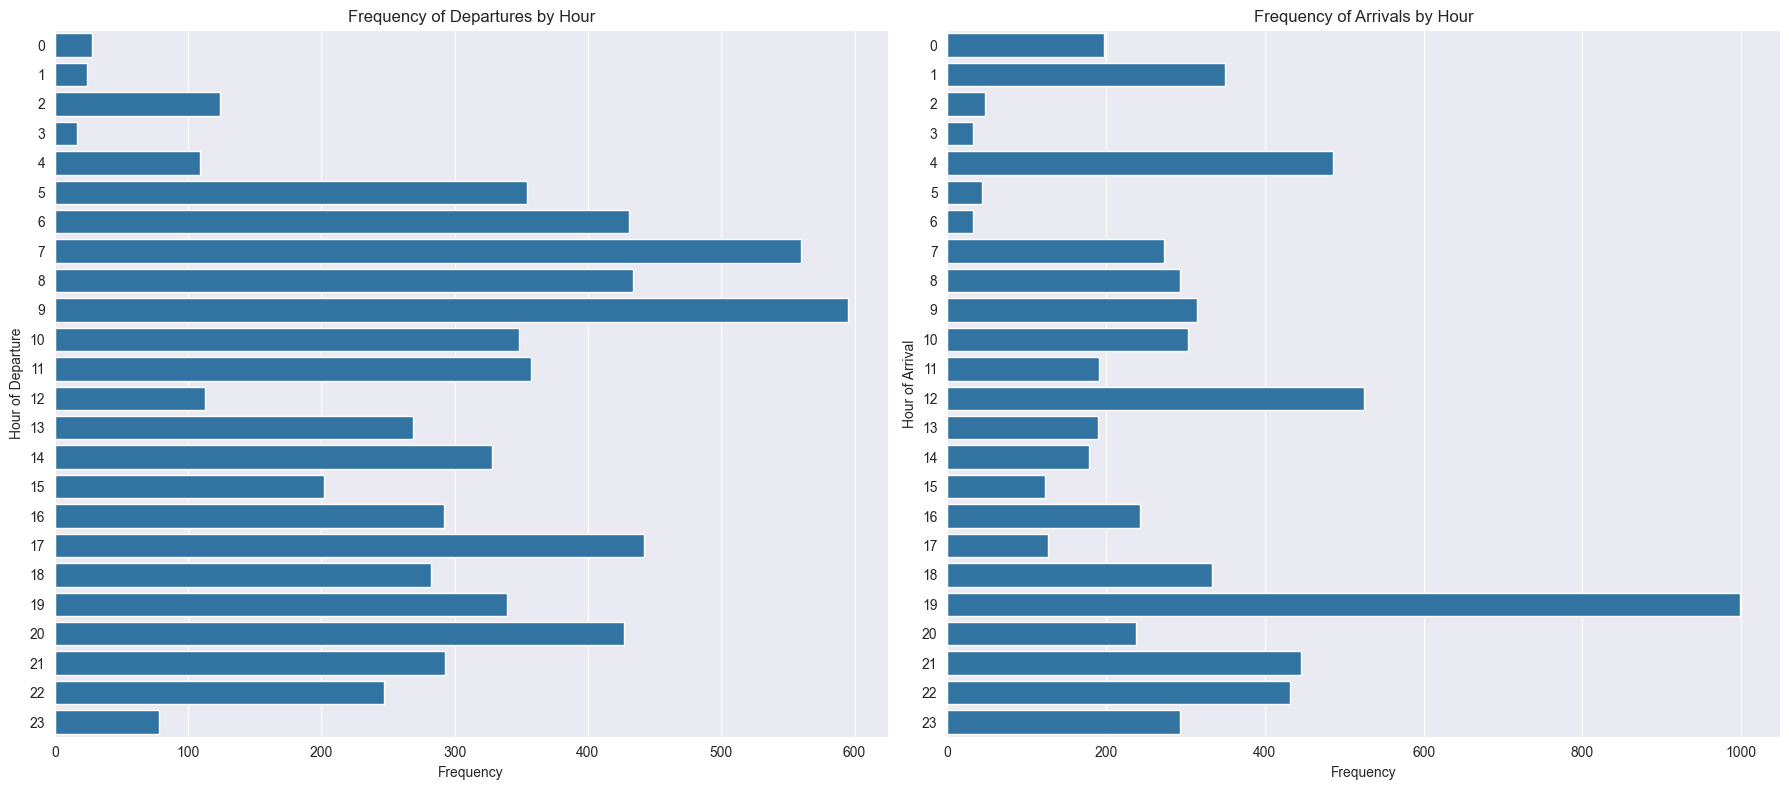

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(y=train_df['dep_time'].apply(lambda x: x.hour), order=np.arange(0, 24), ax=axs[0])
axs[0].set_title('Frequency of Departures by Hour')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Hour of Departure')

sns.countplot(y=train_df['arrival_time'].apply(lambda x: x.hour), order=np.arange(0, 24), ax=axs[1])
axs[1].set_title('Frequency of Arrivals by Hour')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Hour of Arrival')

plt.tight_layout()
plt.show()

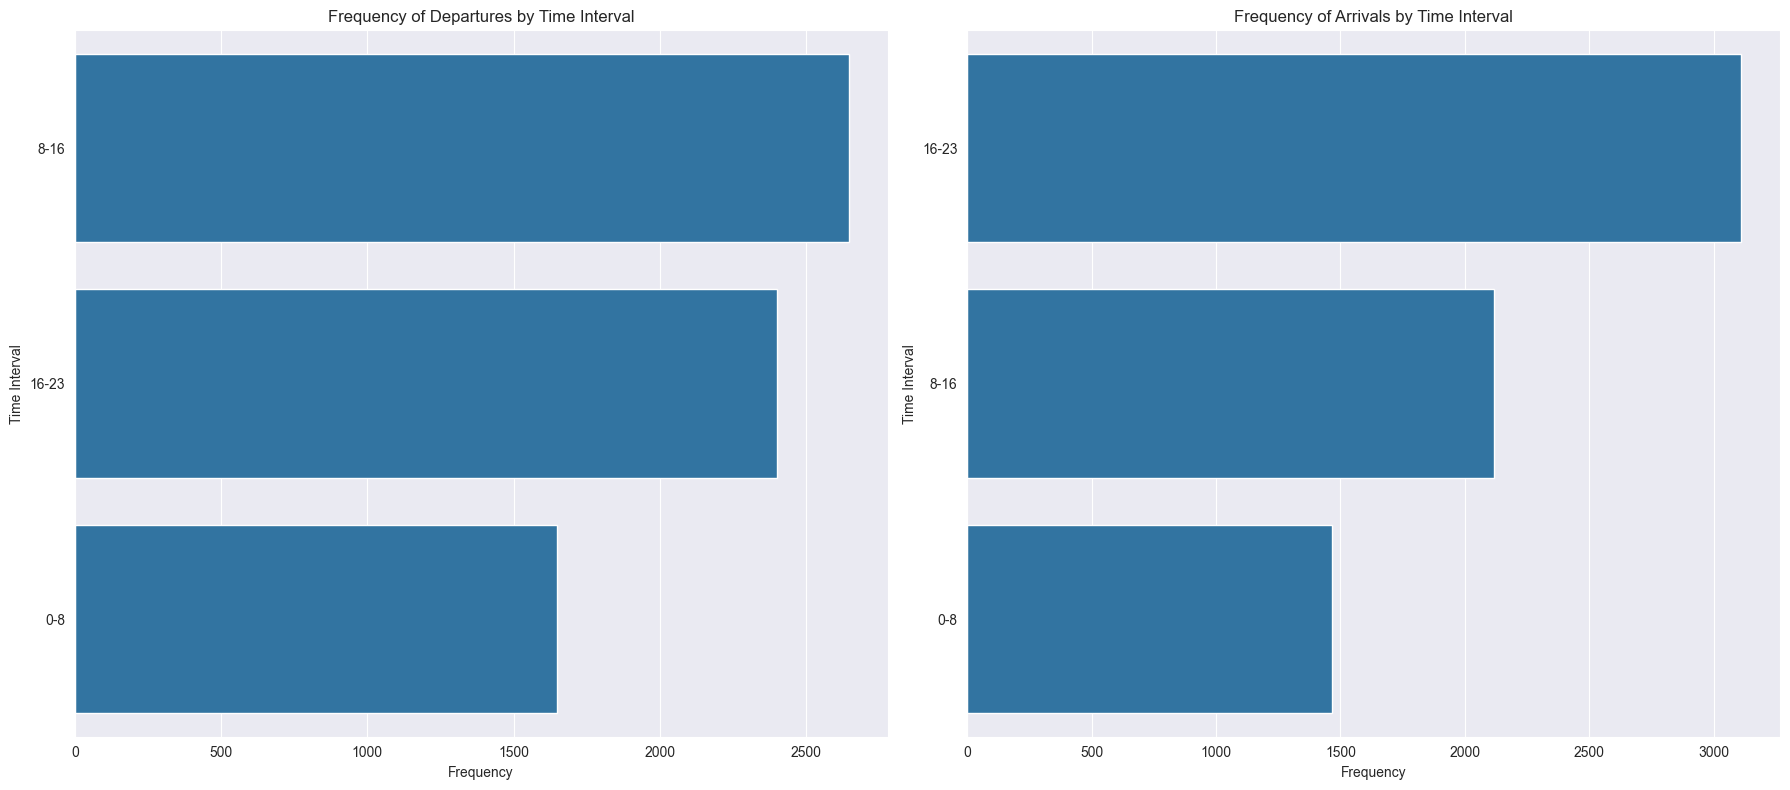

In [24]:
# Bin the hours into three intervals
hour_bins = pd.cut(train_df['dep_time'].apply(lambda x: x.hour), bins=3, labels=['0-8', '8-16', '16-23'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot departure times
sns.countplot(y=hour_bins, ax=axs[0], order=hour_bins.value_counts().index)
axs[0].set_title('Frequency of Departures by Time Interval')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Time Interval')

# Bin the hours for arrival times
hour_bins_arrival = pd.cut(train_df['arrival_time'].apply(lambda x: x.hour), bins=3, labels=['0-8', '8-16', '16-23'])

# Plot arrival times
sns.countplot(y=hour_bins_arrival, ax=axs[1], order=hour_bins_arrival.value_counts().index)
axs[1].set_title('Frequency of Arrivals by Time Interval')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Time Interval')

plt.tight_layout()
plt.show()

### Duration

In [25]:
train_df.duration_minute.describe()

count    6693.000000
mean      623.449873
std       494.402944
min        75.000000
25%       170.000000
50%       505.000000
75%       905.000000
max      2820.000000
Name: duration_minute, dtype: float64

In [26]:
round(train_df.duration_minute.skew(),2), round(train_df.duration_minute.kurt(),2)

(0.92, 0.0)

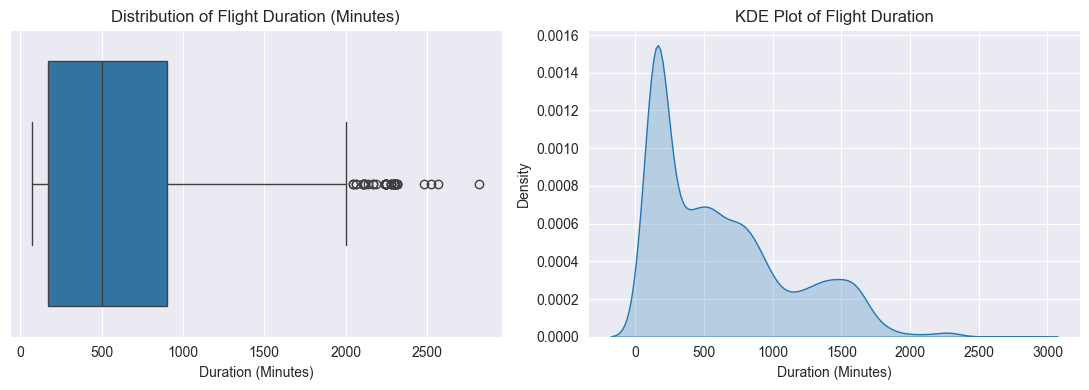

In [27]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(x=train_df['duration_minute'], ax=axes[0])
axes[0].set_title('Distribution of Flight Duration (Minutes)')
axes[0].set_xlabel('Duration (Minutes)')
axes[0].set_ylabel('')

sns.kdeplot(train_df['duration_minute'], fill=True, ax=axes[1])
axes[1].set_title('KDE Plot of Flight Duration')
axes[1].set_xlabel('Duration (Minutes)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [28]:
Q1 = train_df['duration_minute'].quantile(0.25)
Q3 = train_df['duration_minute'].quantile(0.75)
IQR = Q3 - Q1
duration_minute_upper_whisker = Q3 + 1.5 * IQR
duration_minute_upper_whisker

2007.5

In [29]:
(train_df.duration_minute > duration_minute_upper_whisker).sum()

47

In [30]:
round(((train_df.duration_minute > duration_minute_upper_whisker).sum()/train_df.shape[0])*100,2)

0.7

In [31]:
train_df[train_df.duration_minute > duration_minute_upper_whisker]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration_minute,total_stops,additional_info,price
185,Jet Airways,2019-03-03,Delhi,Cochin,18:20:00,04:25:00,2045,2,no info,20747
271,Air India,2019-05-15,Kolkata,Banglore,05:50:00,16:15:00,2065,2,no info,12723
450,Jet Airways,2019-03-06,Delhi,Cochin,05:25:00,19:45:00,2300,2,no info,16914
842,Air India,2019-03-06,Delhi,Cochin,07:05:00,19:15:00,2170,2,no info,11552
874,Jet Airways,2019-03-27,Delhi,Cochin,06:20:00,19:45:00,2245,2,no info,12273
1101,Air India,2019-03-24,Kolkata,Banglore,12:00:00,23:15:00,2115,3,no info,14221
1109,Air India,2019-03-03,Banglore,New Delhi,11:05:00,22:10:00,2105,2,no info,11948
1134,Air India,2019-06-09,Delhi,Cochin,05:00:00,19:15:00,2295,2,no info,9968
1228,Air India,2019-06-12,Delhi,Cochin,05:00:00,19:15:00,2295,2,no info,9443
1531,Air India,2019-03-06,Mumbai,Hyderabad,06:00:00,19:25:00,2245,2,no info,13904


### Total Stops

In [32]:
sorted([total_stop for total_stop in train_df.total_stops.unique()])

[0, 1, 2, 3]

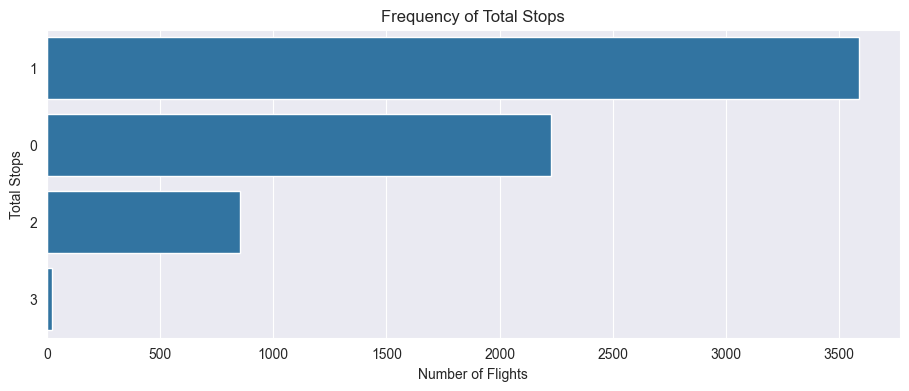

In [33]:
total_stop_counts = train_df['total_stops'].value_counts()
sns.countplot(y=train_df['total_stops'], order=total_stop_counts.index)
plt.title('Frequency of Total Stops')
plt.xlabel('Number of Flights')
plt.ylabel('Total Stops')
plt.show()

### Additional Information

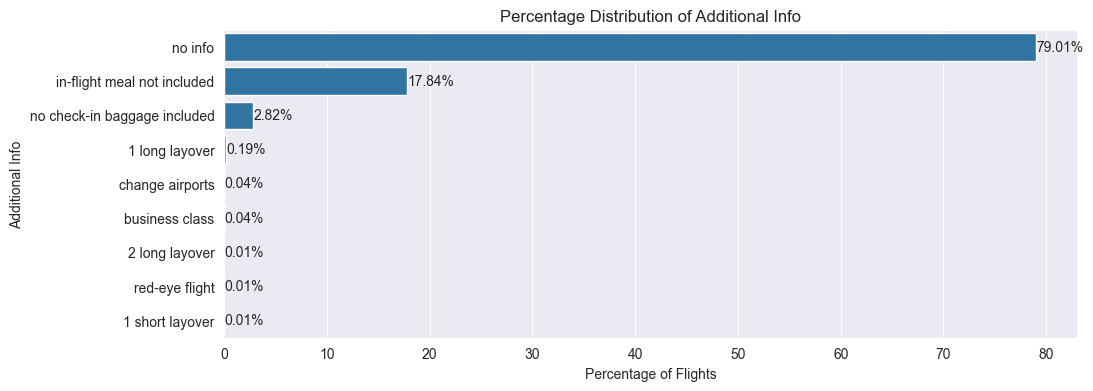

In [34]:
additional_info_counts = train_df['additional_info'].value_counts(normalize=True) * 100
sns.barplot(y=additional_info_counts.index, x=additional_info_counts.values, order=additional_info_counts.index)
plt.title('Percentage Distribution of Additional Info')
plt.xlabel('Percentage of Flights')
plt.ylabel('Additional Info')
for index, value in enumerate(additional_info_counts.values):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.show()

### Price

In [35]:
train_df['price'].describe()

count     6693.000000
mean      9041.796803
std       4642.809703
min       1759.000000
25%       5224.000000
50%       8246.000000
75%      12373.000000
max      79512.000000
Name: price, dtype: float64

In [36]:
train_df['price'].skew()

1.9051444101633521

In [37]:
train_df['price'].kurt()

14.874891994288582

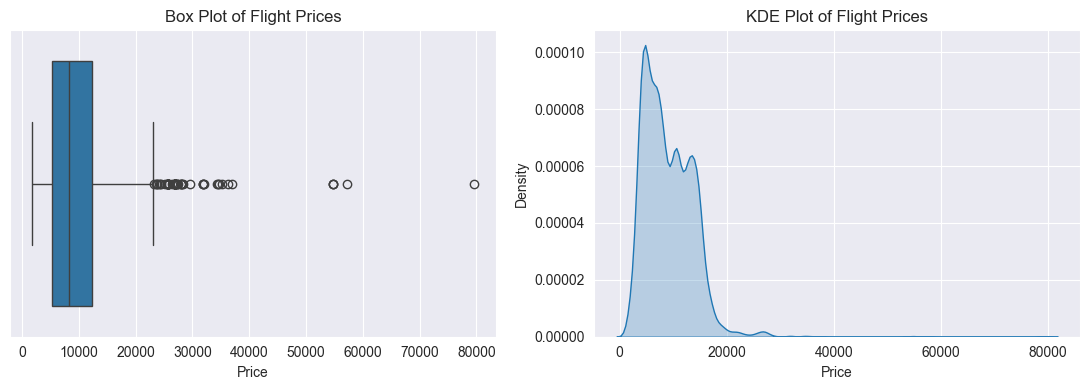

In [38]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(x=train_df['price'], ax=axes[0])
axes[0].set_title('Box Plot of Flight Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('')

sns.kdeplot(train_df['price'], fill=True, ax=axes[1])
axes[1].set_title('KDE Plot of Flight Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

plt.tight_layout()

plt.show()

In [39]:
Q1 = train_df['price'].quantile(0.25)
Q3 = train_df['price'].quantile(0.75)
IQR = Q3 - Q1
price_upper_whisker = Q3 + 1.5 * IQR
price_upper_whisker

23096.5

In [40]:
(train_df.price > price_upper_whisker).sum()

60

In [41]:
round(((train_df.price > price_upper_whisker).sum()/train_df.shape[0])*100,2)

0.9

In [42]:
extreme_price = train_df[train_df.price > price_upper_whisker]['price']

In [43]:
extreme_price.describe()

count       60.000000
mean     30396.400000
std      10015.955668
min      23267.000000
25%      25735.000000
50%      26890.000000
75%      30102.250000
max      79512.000000
Name: price, dtype: float64

In [44]:
extreme_price.skew()

3.1087391949961356

In [45]:
extreme_price.kurt()

10.696750655188426

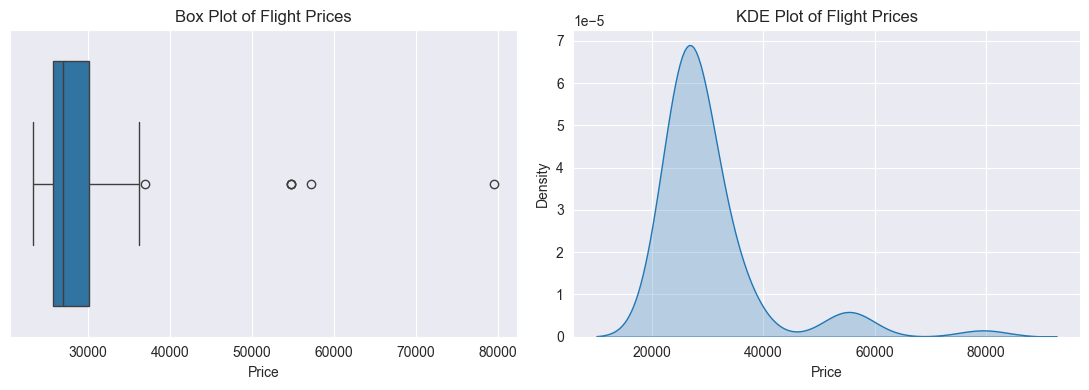

In [46]:
fig, axes = plt.subplots(1, 2)

sns.boxplot(x=extreme_price, ax=axes[0])
axes[0].set_title('Box Plot of Flight Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('')

sns.kdeplot(extreme_price, fill=True, ax=axes[1])
axes[1].set_title('KDE Plot of Flight Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

plt.tight_layout()

plt.show()

In [47]:
Q1 = extreme_price.quantile(0.25)
Q3 = extreme_price.quantile(0.75)
IQR = Q3 - Q1
extreme_price_upper_whisker = Q3 + 1.5 * IQR
extreme_price_upper_whisker

36653.125

In [48]:
(train_df.price > extreme_price_upper_whisker).sum()

6

In [49]:
train_df[train_df.price > extreme_price_upper_whisker]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration_minute,total_stops,additional_info,price
72,Jet Airways,2019-03-01,Banglore,New Delhi,16:55:00,23:00:00,365,1,no info,54826
360,Jet Airways,2019-03-01,Banglore,New Delhi,09:45:00,14:25:00,280,1,business class,57209
370,Multiple Carriers,2019-03-01,Delhi,Cochin,12:50:00,19:15:00,385,1,no info,36983
2700,Jet Airways,2019-03-18,Banglore,New Delhi,18:40:00,00:45:00,365,1,no info,54826
4173,Jet Airways,2019-03-01,Banglore,New Delhi,05:45:00,11:25:00,340,1,business class,79512
4812,Jet Airways,2019-03-18,Banglore,New Delhi,22:50:00,05:05:00,375,1,no info,54826


In [50]:
(train_df[train_df['duration_minute'] <= 385].shape[0])/(train_df.shape[0])*100

42.297923203346784

In [51]:
(train_df[train_df['duration_minute'] <= train_df[train_df.price > extreme_price_upper_whisker]['duration_minute'].max()].shape[0])\
/(train_df.shape[0])*100

42.297923203346784

In [52]:
train_df[(train_df['source'].isin(['Banglore'])) & (train_df['destination'].isin(['New Delhi']))].describe()

,date_of_journey,duration_minute,total_stops,price
count,579,579.000000,579.000000,579.000000
mean,2019-03-11 13:15:51.295336704,648.151986,0.778929,11902.158895
min,2019-03-01 00:00:00,155.000000,0.000000,3383.000000
25%,2019-03-03 00:00:00,175.000000,0.000000,7229.000000
50%,2019-03-12 00:00:00,495.000000,1.000000,10873.000000
75%,2019-03-18 00:00:00,960.000000,1.000000,13817.000000
max,2019-03-24 00:00:00,2315.000000,3.000000,79512.000000
std,NaN,499.956266,0.619330,7602.021508


## Bivariate Analysis

### Airline vs Price

In [53]:
train_df.groupby('airline')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Air Asia,201.0,5479.363184,1929.188698,3383.0,4282.00,5162.0,6181.0,13774.0
Air India,1056.0,9640.527462,3939.318464,2050.0,6843.50,9416.0,12358.0,31945.0
Goair,133.0,5967.330827,2881.545649,3398.0,3948.00,5135.0,6922.0,22794.0
Indigo,1356.0,5696.820059,2335.608469,2227.0,4226.00,5037.5,6496.0,22153.0
Jet Airways,2337.0,11705.248609,4722.138955,2071.0,8586.00,11467.0,14151.0,79512.0
Multiple Carriers,799.0,11004.679599,3780.936692,5797.0,7816.00,10197.0,13587.0,36983.0
Spicejet,507.0,4368.877712,1959.301483,1759.0,3597.00,3873.0,4783.5,23267.0
Vistara,304.0,7741.868421,2933.063994,3687.0,5324.25,7927.0,9345.0,21730.0


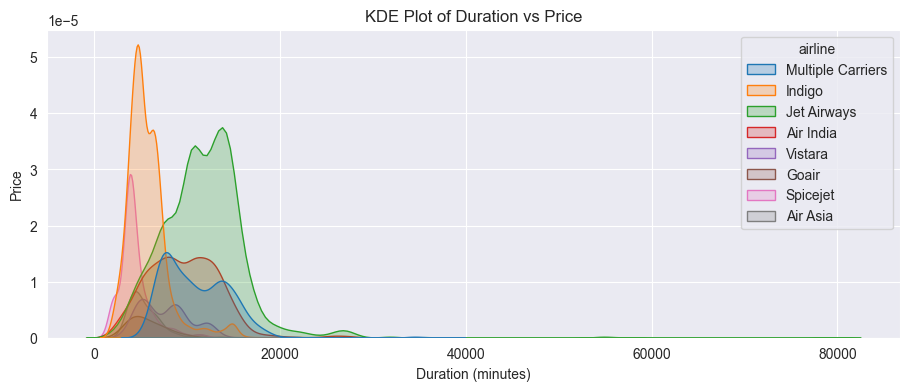

In [54]:
sns.kdeplot(x='price', data=train_df, fill=True, hue='airline')
plt.title('KDE Plot of Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

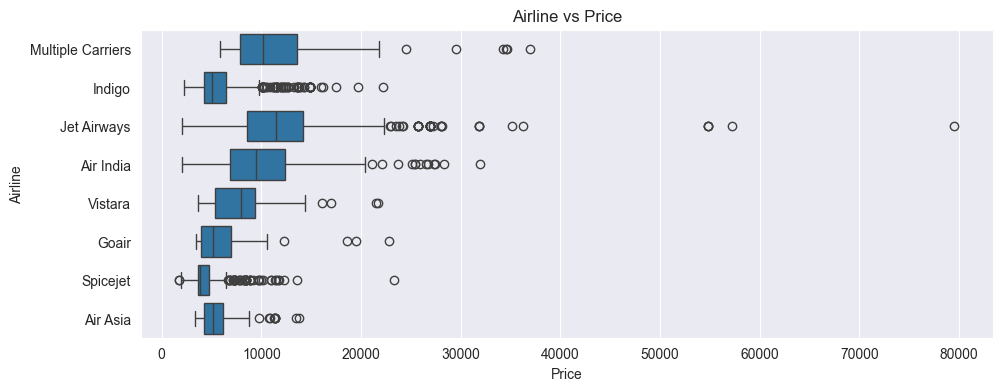

In [55]:
sns.boxplot(y='airline', x='price', data=train_df)
plt.title('Airline vs Price')
plt.ylabel('Airline')
plt.xlabel('Price')
plt.show()

### Date of Journey vs Price

In [56]:
temp_df = pd.DataFrame(data= {
    'month':   train_df.date_of_journey.dt.month_name(),
    'price': train_df.price
})

In [57]:
temp_df.groupby('month')['price'].mean()

month
April     5780.300595
June      8688.842105
March    10690.154839
May       9095.233603
Name: price, dtype: float64

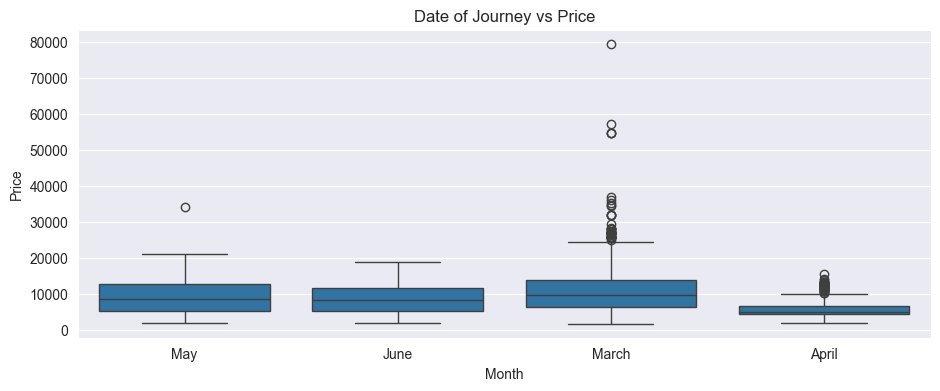

In [58]:
sns.boxplot(x=train_df.date_of_journey.dt.month_name(), y=train_df['price'])
plt.title('Date of Journey vs Price')
plt.ylabel('Price')
plt.xlabel('Month')
plt.show()

### Source vs Price & Destination vs Price

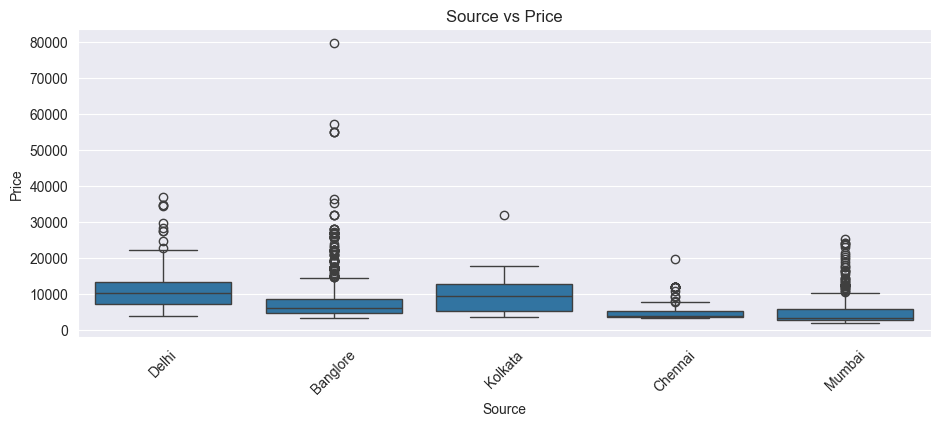

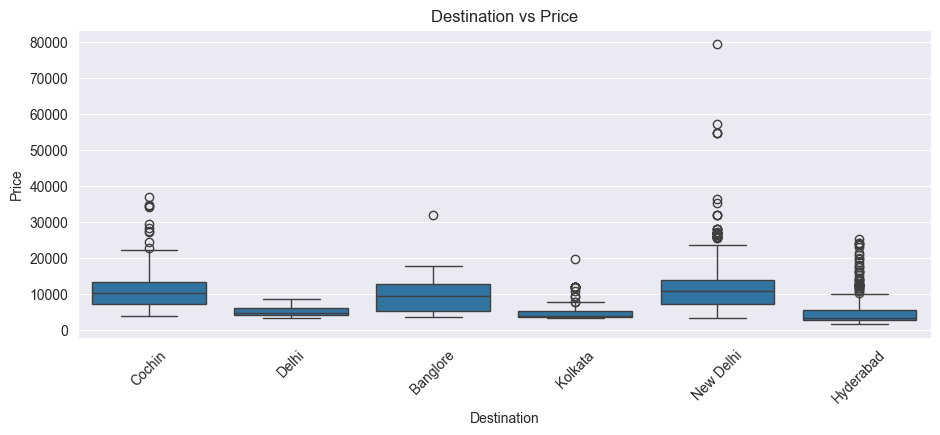

In [59]:
sns.boxplot(x='source', y='price', data=train_df)
plt.title('Source vs Price')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='destination', y='price', data=train_df)
plt.title('Destination vs Price')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Departure Time vs Price & Arrival Time vs Price

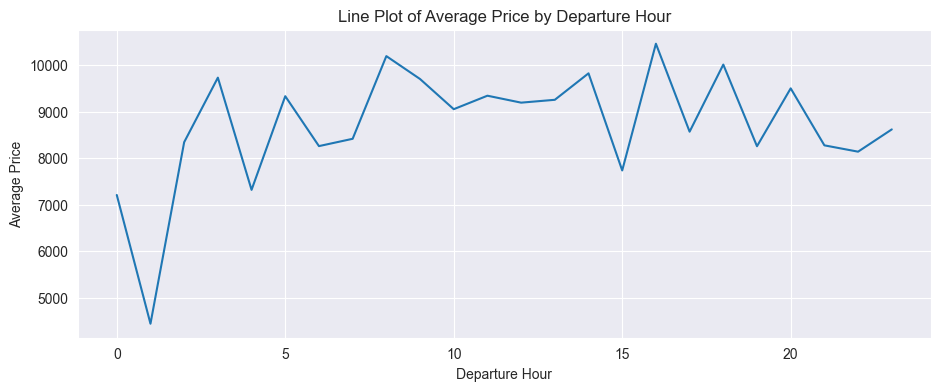

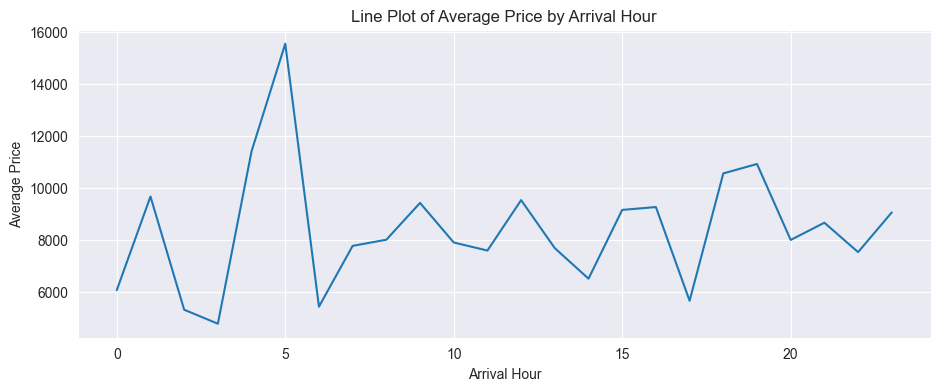

In [60]:
dep_time_price = train_df.groupby(train_df['dep_time'].apply(lambda x: x.hour))['price'].mean().reset_index()
sns.lineplot(x='dep_time', y='price', data=dep_time_price)
plt.title('Line Plot of Average Price by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Price')
plt.show()

arrival_time_price = train_df.groupby(train_df['arrival_time'].apply(lambda x: x.hour))['price'].mean().reset_index()
sns.lineplot(x='arrival_time', y='price', data=arrival_time_price)
plt.title('Line Plot of Average Price by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Average Price')
plt.show()

### Duration vs Price

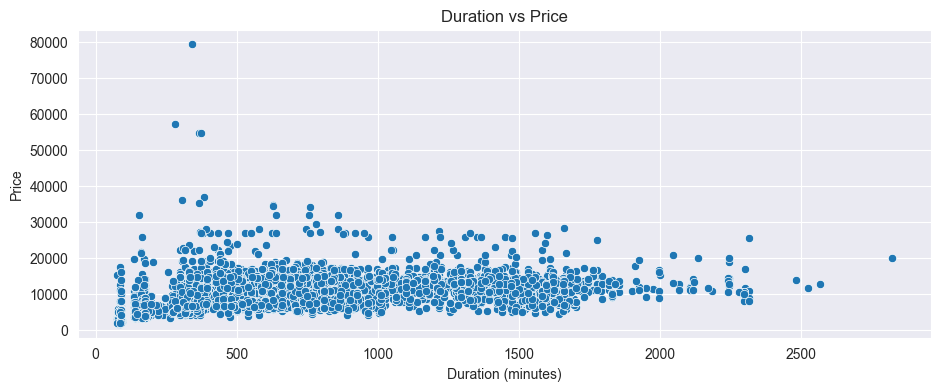

In [61]:
sns.scatterplot(x='duration_minute', y='price', data=train_df)
plt.title('Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

### Total Stops vs Price

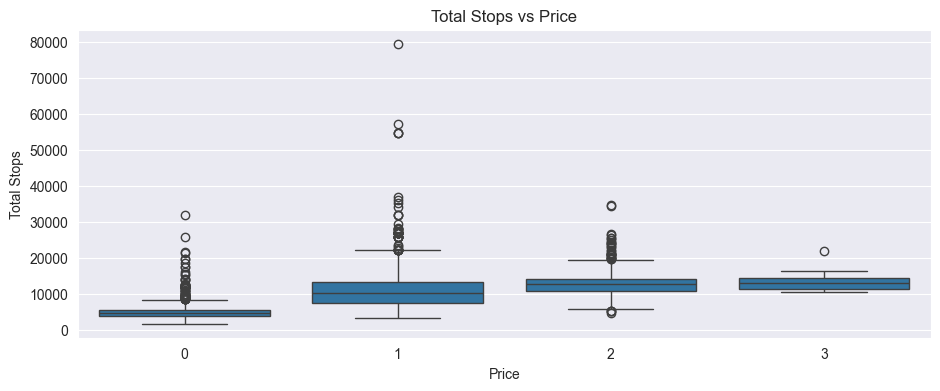

In [62]:
sns.boxplot(x='total_stops', y='price', data=train_df)
plt.title('Total Stops vs Price')
plt.ylabel('Total Stops')
plt.xlabel('Price')
plt.show()

### Additional Information vs Price

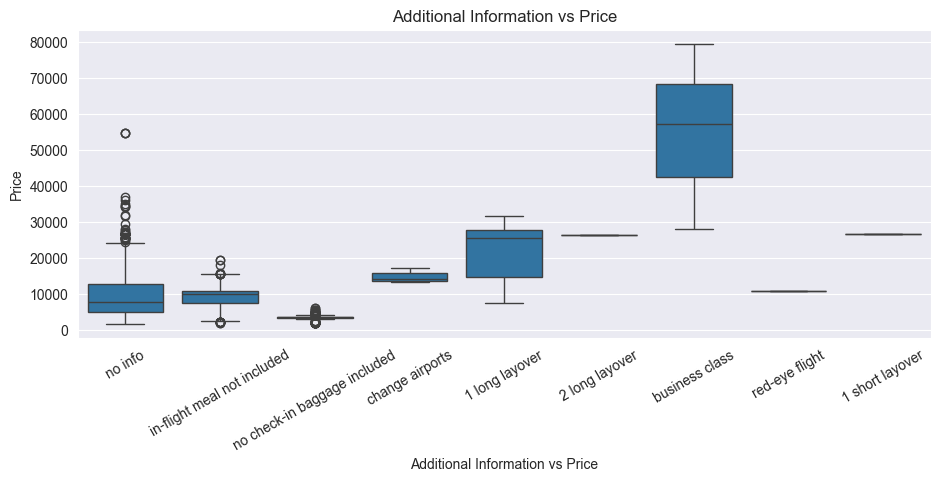

In [63]:
sns.boxplot(x='additional_info', y='price', data=train_df)
plt.title('Additional Information vs Price')
plt.ylabel('Price')
plt.xlabel('Additional Information vs Price')
plt.xticks(rotation=30)
plt.show()

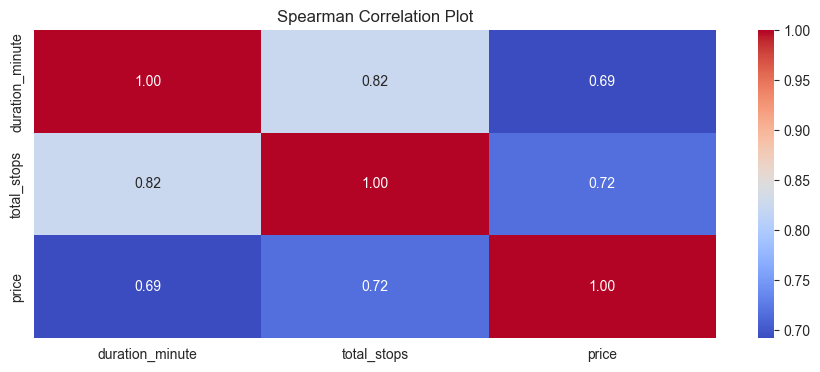

In [64]:
spearman_corr = train_df.corr(numeric_only=True, method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Plot')
plt.show()